In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSC-105/healthcare_data.csv")
df

,Patient_ID,Patient_Name,Age,Gender,Blood_Type,Diagnosis,Treatment_Cost
0,1001,John Smith,45,Male,A+,Hypertension,1200.50
1,1002,Jane Doe,62,Female,B-,Diabetes,800.75
2,1003,Robert Johnson,35,Male,O+,Cancer,5500.00
3,1004,Susan Wilson,78,Female,A-,Heart Disease,2700.25
4,1005,Michael Brown,55,Male,AB+,Asthma,400.00
5,1006,Lisa Miller,30,Female,B+,Hypertension,NaN
6,1007,James Davis,48,Male,O-,Diabetes,950.25
7,1008,Karen Harris,65,Female,AB-,Cancer,NaN
8,1009,David Wilson,72,Male,A+,Heart Disease,3200.00
9,1010,Linda Smith,42,Female,O+,Asthma,NaN


In [ ]:
df.shape

(50, 7)

In [ ]:
df_cleaned = df.dropna()
df_cleaned.shape

(34, 7)

Through inspection of the dataframe, the 'NaN' values are all in the 'Treatment_Cost' column. The cleaned dataframe will be used in calculations involving this column.

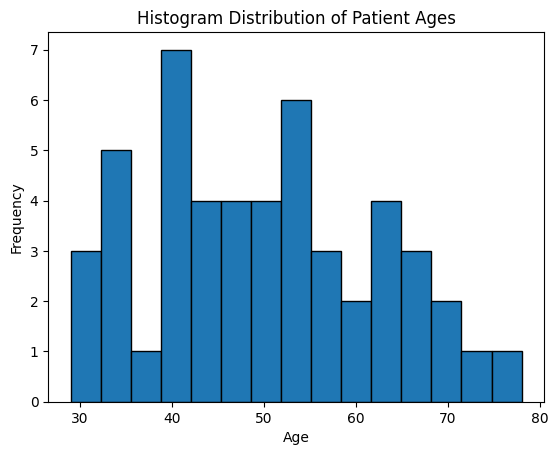

In [ ]:
plt.hist(df['Age'], bins=15, edgecolor='black')
plt.title('Histogram Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [ ]:
percentage_male = ((df['Gender'] == 'Male').sum() / len(df)) * 100

print(f"The percentage of male patients is {percentage_male}%")

The percentage of male patients is 50.0%


In [ ]:
sum_cancer = (df['Diagnosis'] == 'Cancer').sum()

print(f"The number of patients diagnosed with cancer is {sum_cancer}")

The number of patients diagnosed with cancer is 10


In [ ]:
average_60 = df_cleaned[df_cleaned['Age'] >= 60]['Treatment_Cost'].mean()
rounded_average = round(average_60,2)

print(f"The average cost of treatment for patients over the age of 60 is ${rounded_average}")

The average cost of treatment for patients over the age of 60 is $2344.59


In [ ]:
df_blood_type = round(df_cleaned.groupby('Blood_Type')['Treatment_Cost'].mean().sort_values(ascending=False),2)
print('The average cost of treatment for each blood type in dollars:')
df_blood_type

The average cost of treatment for each blood type in dollars:


Blood_Type
A+     3594.50
O+     2870.12
AB+    2232.69
O-     1935.25
AB-    1923.83
A-     1470.30
B-      860.75
B+      860.25
Name: Treatment_Cost, dtype: float64

In [ ]:
highest_treatment_cost = df_blood_type.idxmax()

print(f"From this table, the blood type with the highest average treatment cost is {highest_treatment_cost}")

From this table, the blood type with the highest average treatment cost is A+


In [ ]:
average_age = round(df.groupby(['Gender','Diagnosis'])['Age'].mean())
print("The average age of patients seperated by gender and by diagnosis:\n")
average_age

The average age of patients seperated by gender and by diagnosis:



Gender  Diagnosis    
Female  Asthma           48.0
        Cancer           55.0
        Diabetes         54.0
        Heart Disease    58.0
        Hypertension     45.0
Male    Asthma           49.0
        Cancer           44.0
        Diabetes         52.0
        Heart Disease    55.0
        Hypertension     39.0
Name: Age, dtype: float64